In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 8)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [3]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet

In [4]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 30,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)  # this is for normalization, basically to shorten the range
val_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/training_set',
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   shuffle=True,  # shuffle the images in every iteration
                                                   class_mode='binary')

val_generator = val_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/test_set',
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   shuffle=False,
                                                   class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
train_generator.__next__()[1]

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

In [6]:
sample = train_generator.__next__()

In [7]:
len(sample)

2

In [8]:
type(sample)

tuple

In [9]:
sample[1]

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
      dtype=float32)

In [10]:
sample[0].shape

(32, 150, 150, 3)

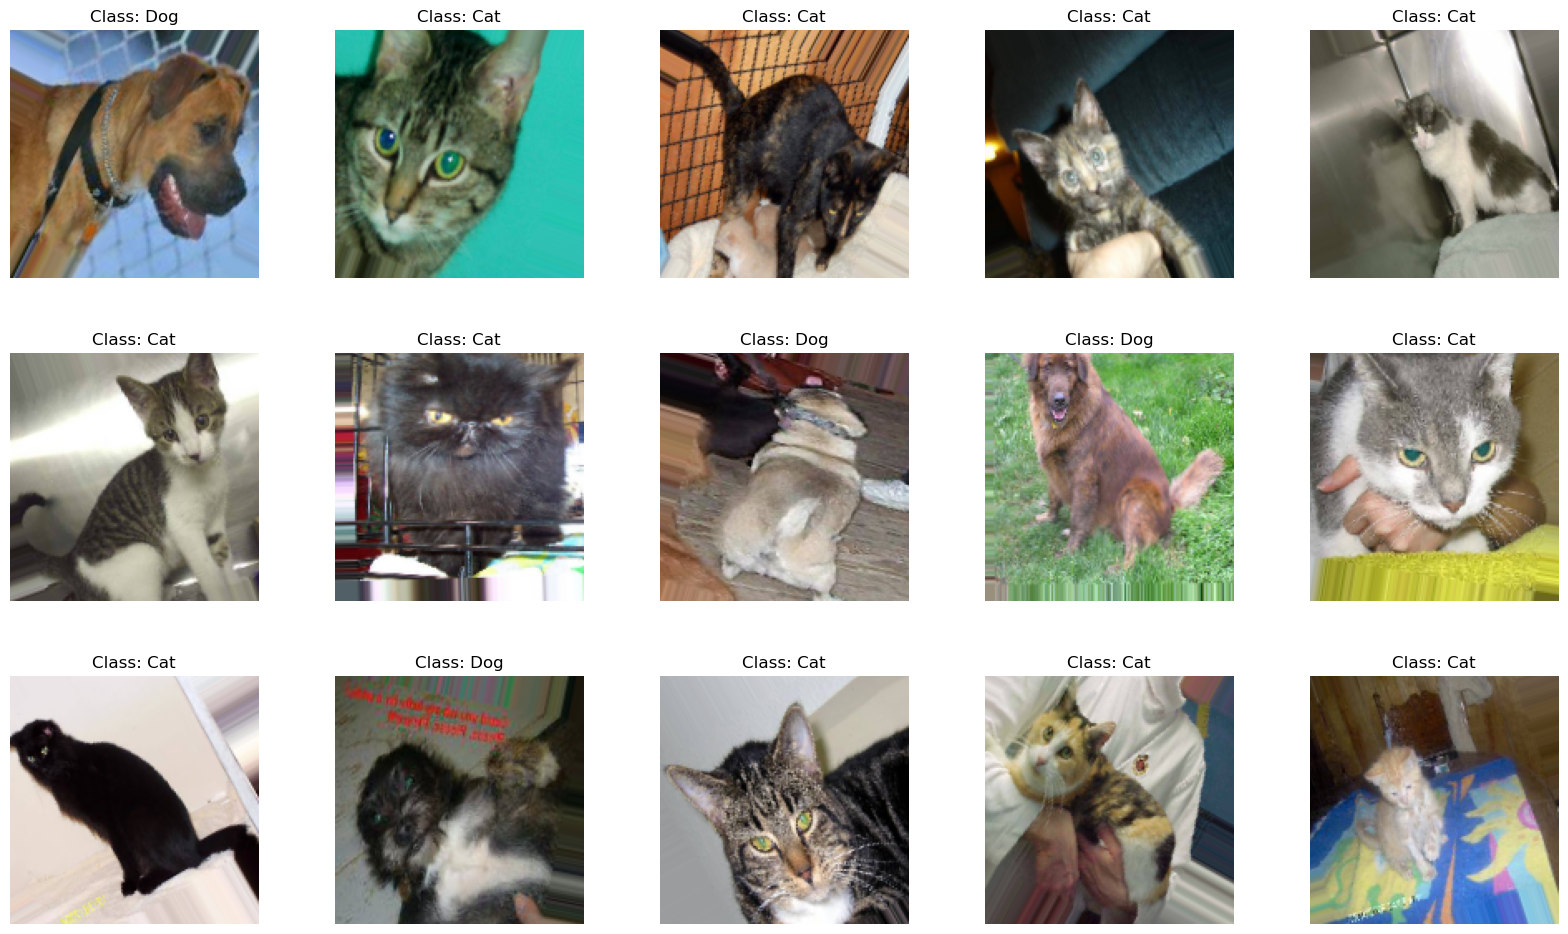

In [11]:
labels = ['Cat','Dog']
samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

OWN MODEL

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (img_size, img_size, 3), activation = 'relu', padding = 'same'))  # 32 filters, each of size 3x3, non linearity so relu
model.add(MaxPooling2D())
model.add(Conv2D(63, (3, 3), activation = 'relu', padding = 'same'))  # 32 filters, each of size 3x3, non linearity so relu
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))  # 32 filters, each of size 3x3, non linearity so relu
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 63)        18207     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 63)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       72704     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator, validation_data = val_generator, epochs = 15)

Epoch 1/15
250/250 [==============================] - 124s 463ms/step - loss: 0.7016 - accuracy: 0.5519 - val_loss: 0.6577 - val_accuracy: 0.5980
Epoch 2/15
250/250 [==============================] - 71s 282ms/step - loss: 0.6403 - accuracy: 0.6373 - val_loss: 0.6106 - val_accuracy: 0.6705
Epoch 3/15
250/250 [==============================] - 69s 278ms/step - loss: 0.6066 - accuracy: 0.6678 - val_loss: 0.5756 - val_accuracy: 0.7000
Epoch 4/15
250/250 [==============================] - 70s 281ms/step - loss: 0.5808 - accuracy: 0.6949 - val_loss: 0.5686 - val_accuracy: 0.7035
Epoch 5/15
250/250 [==============================] - 70s 279ms/step - loss: 0.5539 - accuracy: 0.7182 - val_loss: 0.5643 - val_accuracy: 0.7200
Epoch 6/15
250/250 [==============================] - 70s 279ms/step - loss: 0.5271 - accuracy: 0.7389 - val_loss: 0.5494 - val_accuracy: 0.7320
Epoch 7/15
250/250 [==============================] - 70s 280ms/step - loss: 0.5099 - accuracy: 0.7523 - val_loss: 0.4639 - val_a

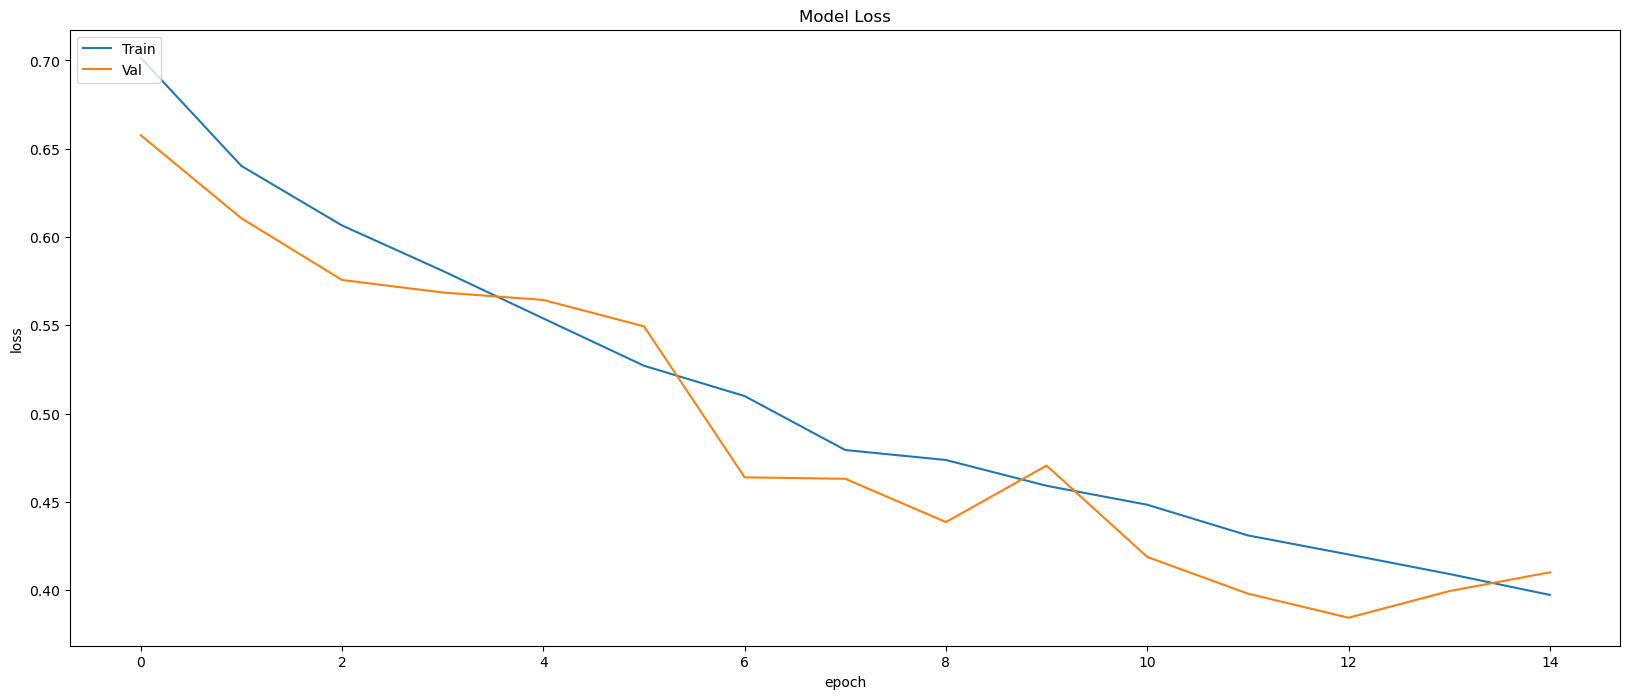

In [17]:
plt.figure(figsize = (20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [18]:
# val_generator.__dict__

In [19]:
classes = val_generator.classes
y_pred = model.predict(val_generator)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred < 0.5] = 0

63/63 [==============================] - 7s 104ms/step


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(classes, y_pred, target_names = labels))

              precision    recall  f1-score   support

         Cat       0.86      0.77      0.81      1000
         Dog       0.79      0.88      0.83      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [22]:
print(confusion_matrix(classes, y_pred))

[[765 235]
 [125 875]]


In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer

USING PRE TRAINED MODELS

In [24]:
base_model = VGG16(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings = Model(inputs=input_layer, outputs=output)
embeddings.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
embeddings.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history_1 = model.fit(train_generator, validation_data = val_generator, epochs = 15)

Epoch 1/15
250/250 [==============================] - 70s 279ms/step - loss: 0.3880 - accuracy: 0.8289 - val_loss: 0.3820 - val_accuracy: 0.8410
Epoch 2/15
250/250 [==============================] - 69s 278ms/step - loss: 0.3754 - accuracy: 0.8296 - val_loss: 0.3980 - val_accuracy: 0.8370
Epoch 3/15
250/250 [==============================] - 70s 280ms/step - loss: 0.3754 - accuracy: 0.8316 - val_loss: 0.3909 - val_accuracy: 0.8285
Epoch 4/15
250/250 [==============================] - 70s 278ms/step - loss: 0.3728 - accuracy: 0.8332 - val_loss: 0.3479 - val_accuracy: 0.8560
Epoch 5/15
250/250 [==============================] - 70s 279ms/step - loss: 0.3571 - accuracy: 0.8425 - val_loss: 0.3678 - val_accuracy: 0.8530
Epoch 6/15
250/250 [==============================] - 70s 279ms/step - loss: 0.3517 - accuracy: 0.8456 - val_loss: 0.3614 - val_accuracy: 0.8505
Epoch 7/15
250/250 [==============================] - 70s 280ms/step - loss: 0.3493 - accuracy: 0.8428 - val_loss: 0.3385 - val_ac

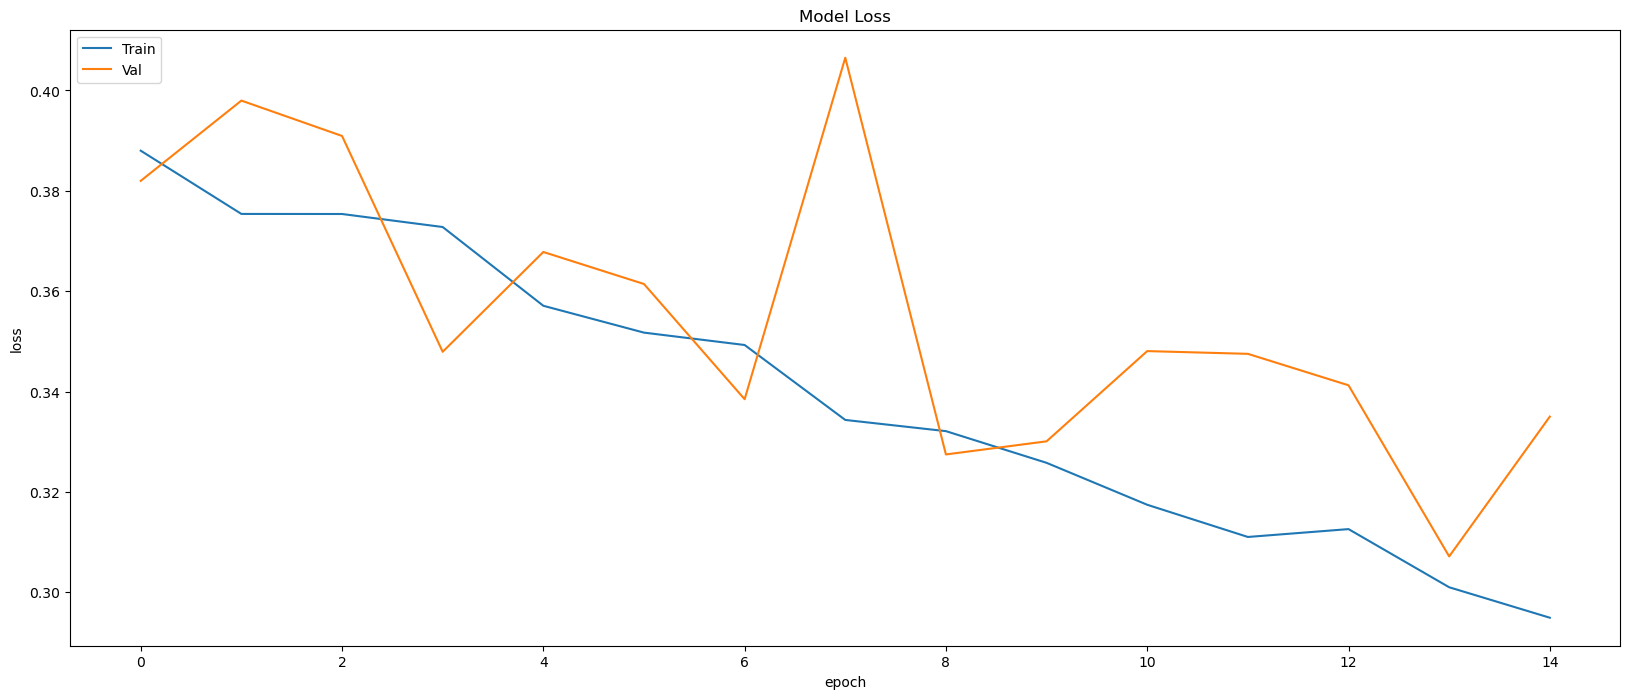

In [27]:
plt.figure(figsize = (20, 8))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [28]:
classes = val_generator.classes
y_pred = model.predict(val_generator)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred < 0.5] = 0

63/63 [==============================] - 7s 103ms/step


In [29]:
print(classification_report(classes, y_pred, target_names = labels))

              precision    recall  f1-score   support

         Cat       0.90      0.82      0.86      1000
         Dog       0.84      0.91      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [30]:
base_model = InceptionV3(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings_1 = Model(inputs=input_layer, outputs=output)
embeddings_1.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
embeddings_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history_2 = model.fit(train_generator, validation_data = val_generator, epochs = 15)

Epoch 1/15
250/250 [==============================] - 70s 281ms/step - loss: 0.2924 - accuracy: 0.8719 - val_loss: 0.3039 - val_accuracy: 0.8770
Epoch 2/15
250/250 [==============================] - 70s 281ms/step - loss: 0.2898 - accuracy: 0.8742 - val_loss: 0.3242 - val_accuracy: 0.8675
Epoch 3/15
250/250 [==============================] - 69s 277ms/step - loss: 0.2871 - accuracy: 0.8769 - val_loss: 0.3143 - val_accuracy: 0.8785
Epoch 4/15
250/250 [==============================] - 69s 278ms/step - loss: 0.2832 - accuracy: 0.8791 - val_loss: 0.2978 - val_accuracy: 0.8860
Epoch 5/15
250/250 [==============================] - 70s 278ms/step - loss: 0.2708 - accuracy: 0.8835 - val_loss: 0.4235 - val_accuracy: 0.8400
Epoch 6/15
250/250 [==============================] - 70s 281ms/step - loss: 0.2714 - accuracy: 0.8831 - val_loss: 0.3257 - val_accuracy: 0.8810
Epoch 7/15
250/250 [==============================] - 73s 293ms/step - loss: 0.2644 - accuracy: 0.8910 - val_loss: 0.3132 - val_ac

USING PRETRAINED MODELS + FREEZING LAYERS

In [ ]:
img_size = 224
base_model = VGG16(include_top = False,   # include_top is to include the classifier layer; whether to include the 3 fully-connected layers at the top of the network
                  weights = 'imagenet',
                  input_shape = (img_size, img_size, 3))

In [ ]:
base_model.summary()

In [ ]:
base_model.layers

Freezing the bottom layers

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
base_model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model_name = 'model.h5'
checkpoint = ModelCheckpoint(model_name,
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1)

earlystopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 1, restore_best_weights = True)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(10, activation = 'sigmoid')(x)
model = Model(inputs = base_model.inputs, outputs = outputs)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                   validation_data = val_generator, epochs = 10)